# Trabajo Práctico N° 4 Aprendizaje de Máquina

**COVID-19 Detection in Chest X-Ray Images:** El dataset tiene 600+ imágenes en tres carpetas (COVID-19, normal, neumonía). Desarrollar un extractor de características de las imágenes, y luego entrenar un clasificador.  


### 1.1 Importar Características Imágenes

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
import seaborn as sns
import os

In [26]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [27]:
#print()
df_train_tiny = df_train.iloc[:,list(range(30))].drop('Unnamed: 0',axis=1)
df_test_tiny = df_test.iloc[:,list(range(30))].drop('Unnamed: 0',axis=1)
df_train_tiny["target"] = df_train["target"]
df_test_tiny["target"] = df_test["target"]
df_train_tiny[0:10]

,diagnostics_Image-interpolated_Spacing,diagnostics_Image-interpolated_Size,diagnostics_Image-interpolated_Mean,diagnostics_Image-interpolated_Minimum,diagnostics_Image-interpolated_Maximum,diagnostics_Mask-interpolated_Spacing,diagnostics_Mask-interpolated_Size,diagnostics_Mask-interpolated_BoundingBox,diagnostics_Mask-interpolated_VoxelNum,diagnostics_Mask-interpolated_VolumeNum,diagnostics_Mask-interpolated_CenterOfMassIndex,diagnostics_Mask-interpolated_CenterOfMass,diagnostics_Mask-interpolated_Mean,diagnostics_Mask-interpolated_Minimum,diagnostics_Mask-interpolated_Maximum,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,target
0,"(2.0, 2.0, 1.0)","(694, 453, 1)",6.084968,-271.406401,315.603672,"(2.0, 2.0, 1.0)","(694, 453, 1)","(6, 0, 0, 676, 453, 1)",264138,71,"(370.47535379233585, 223.68083350369884, 0.0)","(741.4507075846717, 447.86166700739767, 0.0)",37.162645,-111.883559,315.603672,0.767866,1368.801954,1545.875804,1056624.0,1051.057125,12058.109083,0.011412,1056552.0,0.302194,-63.260104,122.538525,3.126755e+10,5.695934,111.679456,Normal
1,"(2.0, 2.0, 1.0)","(568, 327, 1)",0.000148,-235.394500,383.768037,"(2.0, 2.0, 1.0)","(568, 327, 1)","(0, 0, 0, 568, 327, 1)",137881,43,"(279.9131932608554, 161.91391852394457, 0.0)","(560.3263865217108, 324.32783704788915, 0.0)",49.591854,-97.954805,383.768037,0.751335,1014.113732,1222.399280,551484.0,761.939266,8962.709663,0.016252,551524.0,0.293719,-34.118609,123.858666,1.734718e+10,5.559011,94.275917,Pneumonia
2,"(2.0, 2.0, 1.0)","(1100, 1100, 1)",-0.043689,-267.070187,299.598340,"(2.0, 2.0, 1.0)","(1100, 1100, 1)","(0, 0, 0, 1099, 1100, 1)",1123985,62,"(553.5859562182769, 568.8651289830381, 0.0)","(1107.6719124365538, 1138.2302579660761, 0.0)",16.184923,-224.863946,299.598340,0.981264,2459.013733,3020.744941,4496040.0,2412.941302,18857.278923,0.004194,4495940.0,0.398603,-98.069364,123.592167,1.201457e+11,5.957999,139.060217,COVID-19 cases
3,"(2.0, 2.0, 1.0)","(1250, 1024, 1)",0.027171,-323.549303,249.713589,"(2.0, 2.0, 1.0)","(1250, 1024, 1)","(1, 1, 0, 1248, 1022, 1)",1209153,372,"(647.8287826271778, 522.081253571715, 0.0)","(1296.1575652543556, 1044.66250714343, 0.0)",12.442193,-246.085145,249.713589,0.810164,2826.230864,3215.160338,4836774.0,2289.711488,37825.597088,0.007820,4836612.0,0.206109,-105.369191,146.250061,1.274128e+11,5.893707,137.822541,COVID-19 cases
4,"(2.0, 2.0, 1.0)","(1034, 666, 1)",8.795613,-230.838453,293.927578,"(2.0, 2.0, 1.0)","(1034, 666, 1)","(11, 0, 0, 1012, 666, 1)",539132,14,"(514.4623060771759, 328.9219449040309, 0.0)","(1113.4246121543517, 658.3438898080618, 0.0)",49.857398,-132.930478,293.927578,0.784830,1947.079837,2231.084041,2156528.0,1528.125947,8463.560026,0.003925,2156528.0,0.615077,-40.363225,126.139090,6.805495e+10,5.481929,99.517938,Normal
5,"(2.0, 2.0, 1.0)","(980, 844, 1)",0.000924,-419.551205,294.675676,"(2.0, 2.0, 1.0)","(980, 844, 1)","(0, 0, 0, 980, 844, 1)",787757,50,"(494.44490623377516, 413.51961201233377, 0.0)","(989.3898124675503, 827.5392240246675, 0.0)",13.711955,-316.902435,294.675676,0.900381,2166.164568,2585.381210,3151228.0,1950.373552,15811.751652,0.005018,3151028.0,0.397983,-104.178367,111.929457,8.262574e+10,5.923684,118.543260,Normal
6,"(2.0, 2.0, 1.0)","(881, 625, 1)",-0.044210,-258.556655,292.847667,"(2.0, 2.0, 1.0)","(881, 625, 1)","(5, 0, 0, 876, 624, 1)",461520,113,"(444.101460391749, 298.9645410816433, 0.0)","(888.702920783498, 598.4290821632866, 0.0)",31.747731,-134.828653,292.847667,0.819883,1773.880904,2058.047618,1846296.0,1454.374689,20453.866653,0.011078,1846080.0,0.235494,-72.401604,129.218039,5.330088e+10,5.809437,120

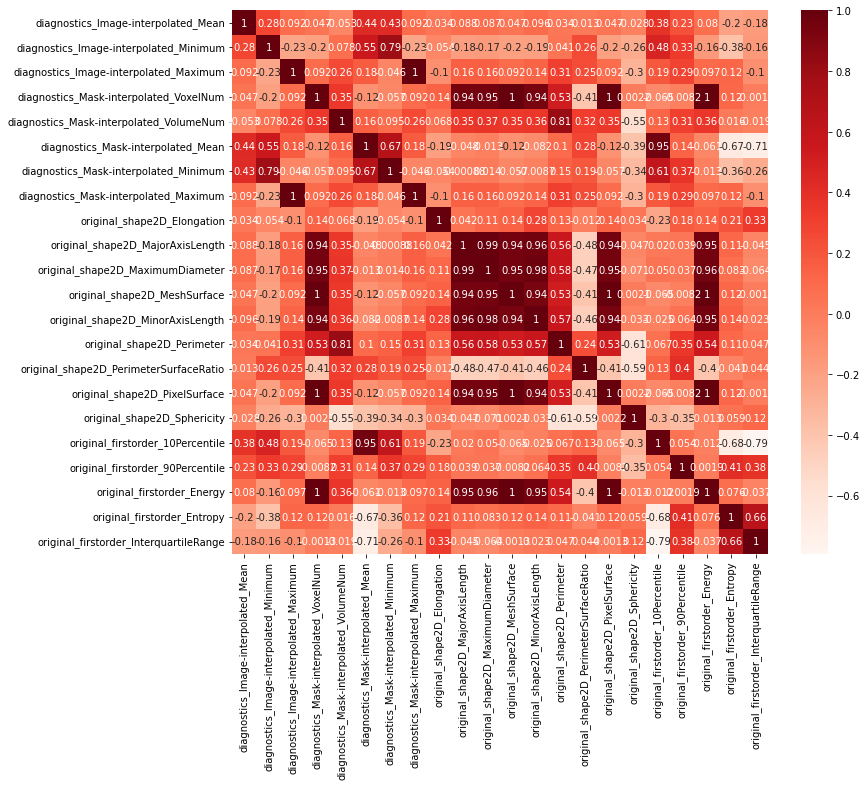

In [28]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_train_tiny.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### 1.2 Selección de características

In [29]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

target = 'target'
X_train = df_train_tiny.select_dtypes(include=['number']).copy()
print(X_train)
#X_train = X_train.drop(target, axis=1)
y_train = df_train_tiny[target].astype('category').cat.codes
X_test = df_test_tiny.select_dtypes(include=['number']).copy()

X_train = X_train.fillna(X_train.mean())
X_test  = X_test.fillna(X_test.mean())

regressor = RandomForestRegressor(n_estimators=100, max_depth=10)

n = 4 #Número de atributos a seleccionar
rfe = RFE(regressor, n_features_to_select=n)
rfe.fit(X_train, y_train)

     diagnostics_Image-interpolated_Mean  ...  original_firstorder_InterquartileRange
0                               6.084968  ...                              111.679456
1                               0.000148  ...                               94.275917
2                              -0.043689  ...                              139.060217
3                               0.027171  ...                              137.822541
4                               8.795613  ...                               99.517938
..                                   ...  ...                                     ...
444                             0.105594  ...                              132.198825
445                            -0.000002  ...                               67.424815
446                            -0.047528  ...                              159.997388
447                            -0.061057  ...                              136.397883
448                             1.108357  ...         

RFE(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                    criterion='mse', max_depth=10,
                                    max_features='auto', max_leaf_nodes=None,
                                    max_samples=None, min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=100, n_jobs=None,
                                    oob_score=False, random_state=None,
                                    verbose=0, warm_start=False),
    n_features_to_select=4, step=1, verbose=0)

In [30]:
from operator import itemgetter
features = X_train.columns.to_list()
features_to_train = []
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    if (x == 1):
      features_to_train.append(y)
    print(x, y)

print(features_to_train)

1 diagnostics_Image-interpolated_Mean
1 diagnostics_Mask-interpolated_Mean
1 original_shape2D_MajorAxisLength
1 original_firstorder_10Percentile
2 diagnostics_Mask-interpolated_Maximum
3 original_shape2D_MaximumDiameter
4 diagnostics_Image-interpolated_Minimum
5 original_shape2D_MinorAxisLength
6 diagnostics_Mask-interpolated_Minimum
7 original_shape2D_Perimeter
8 original_firstorder_InterquartileRange
9 original_shape2D_PerimeterSurfaceRatio
10 original_firstorder_Energy
11 diagnostics_Image-interpolated_Maximum
12 original_firstorder_Entropy
13 original_firstorder_90Percentile
14 diagnostics_Mask-interpolated_VolumeNum
15 original_shape2D_Elongation
16 original_shape2D_MeshSurface
17 original_shape2D_Sphericity
18 original_shape2D_PixelSurface
19 diagnostics_Mask-interpolated_VoxelNum
['diagnostics_Image-interpolated_Mean', 'diagnostics_Mask-interpolated_Mean', 'original_shape2D_MajorAxisLength', 'original_firstorder_10Percentile']


### 1.3 Modelos de Clasificación

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Number of trees in random forest
n_estimators = [200,500,1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,30,50,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

RFC = RandomForestClassifier(n_estimators=100, max_depth=10);
cv1 = GridSearchCV(RFC, parameters, scoring = 'accuracy')
cv1.fit(df_train[features_to_train].to_numpy(),df_train["target"].to_numpy());

In [ ]:
test=cv1.predict(df_test[features_to_train].to_numpy())

Accuracy : 83.67%
                precision    recall  f1-score   support

COVID-19 cases       0.70      0.88      0.78         8
       Normal        0.90      0.81      0.85        57
     Pneumonia       0.78      0.88      0.83        33

      accuracy                           0.84        98
     macro avg       0.80      0.85      0.82        98
  weighted avg       0.85      0.84      0.84        98



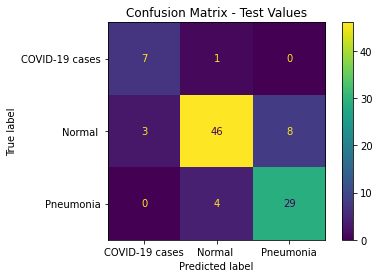

In [33]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn import metrics

def show_metrics(pred,test,model,input):
  accuracy = accuracy_score(pred,test) * 100
  print('Accuracy : {:.2f}%'.format(accuracy))
  print(classification_report(test, pred))

  confusion_matrix = metrics.plot_confusion_matrix(model,input.to_numpy(), test)
  plt.title("Confusion Matrix - Test Values")
  plt.show()

show_metrics(test,df_test["target"],cv1,df_test[features_to_train])

### Support Vector Machine + GridSearch

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from tensorflow import keras

Accuracy : 80.61%
                precision    recall  f1-score   support

COVID-19 cases       0.75      0.75      0.75         8
       Normal        0.81      0.89      0.85        57
     Pneumonia       0.81      0.67      0.73        33

      accuracy                           0.81        98
     macro avg       0.79      0.77      0.78        98
  weighted avg       0.81      0.81      0.80        98



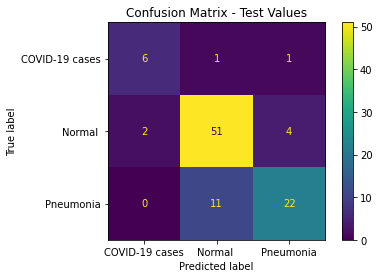

In [35]:
parameters = {'kernel':('poly', 'rbf', 'sigmoid'), 'C':[0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]}

svc = svm.SVC()

cv1 = GridSearchCV(svc, parameters, scoring = 'accuracy')
cv1.fit(df_train[features_to_train].to_numpy(), df_train["target"].to_numpy())

test = cv1.predict(df_test[features_to_train])

show_metrics(test,df_test["target"],cv1,df_test[features_to_train])

#### Multi Layer Perceptron

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy : 77.55%
                precision    recall  f1-score   support

COVID-19 cases       0.36      0.62      0.45         8
       Normal        0.83      0.86      0.84        57
     Pneumonia       0.88      0.67      0.76        33

      accuracy                           0.78        98
     macro avg       0.69      0.72      0.69        98
  weighted avg       0.81      0.78      0.78        98



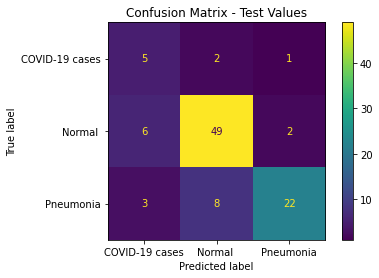

In [36]:
from sklearn.neural_network import MLPClassifier

parameters= {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive'],
}


mlp = MLPClassifier()

cv1 = GridSearchCV(mlp, parameters, scoring = 'accuracy')
cv1.fit(df_train[features_to_train].to_numpy(), df_train["target"].to_numpy())

test = cv1.predict(df_test[features_to_train])

show_metrics(test,df_test["target"],cv1,df_test[features_to_train])

## Conclusiones

* El dataset al ser imágenes a las cuales había que obtenerles características cuantizables hizo un poco más complejo el desarrollo, siendo dividido en dos notebooks diferentes ( extraccion de características e implementación del modelo).
* Se seleccionaron las características que más información aportaban a la salida a través de árboles de decisión.
* Se probaron tres modelos de clasificación diferentes y se utilizó grid search para obtener los parámetros de los modelos que maximizaban la accuracy.
* El modelo de Random Forest es el que mejor resultados dio.
* Los casos de covid fueron los que más problemas tuvieron al ser clasificados, también los que menos imágenes tenían en train/test.